# Soil resin timeseries for Hungerford and Wade wet and dry transects

── Attaching core tidyverse packages ──────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing val

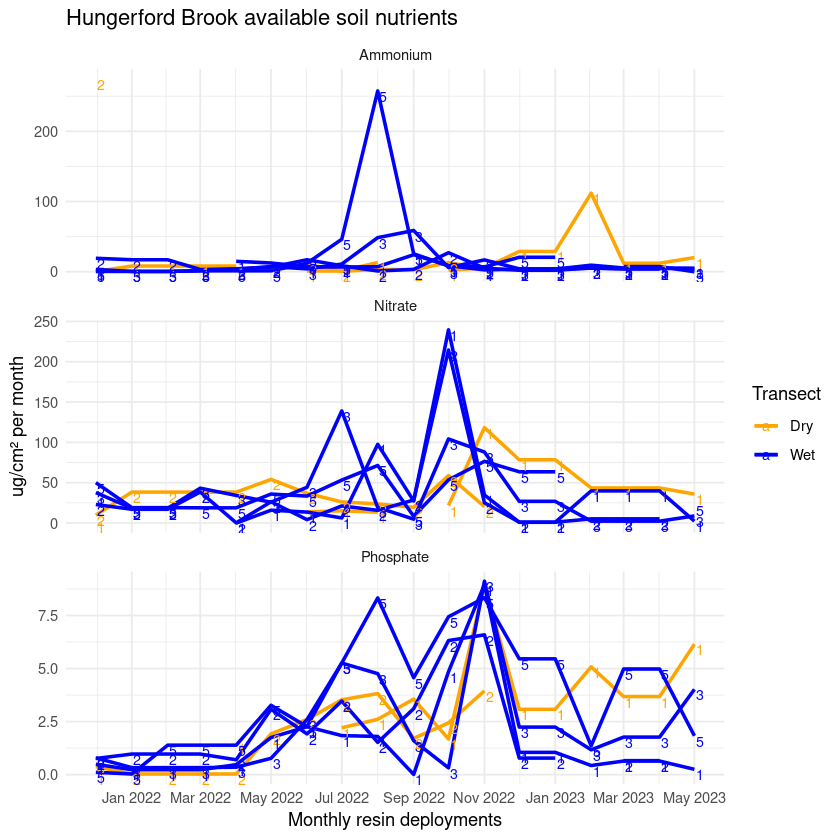

In [1]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"

################
# READ IN DATA #
################

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
# And get the month and year columns into a machine readable date format
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Read in event yield data
yield_data <- read.csv(file.path("~//OneDrive/git-repos/cQ_analysis//millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv"))


######################
# PLOT TIME SERIES #
######################

# Create the plot with faceting by Species and free y-axes
ggplot(resin_data %>% filter(Site == "Hungerford", Species %in% c("Ammonium", "Nitrate", "Phosphate")), 
       aes(x = Date, y = ug_cm2_month, group = Pit, color = Transect)) +
  # Plot line for Dry transect
  geom_line(data = . %>% filter(Transect == "Dry"),
            size = 1) +
  # Plot line for Wet transect
  geom_line(data = . %>% filter(Transect == "Wet"),
            size = 1) +
  # Annotate Pit numbers
  geom_text(aes(label = Pit), hjust = -0.2, vjust = 1, size = 3) +
  # Set custom colors for Dry and Wet transects
  scale_color_manual(values = c("Dry" = "orange", "Wet" = "blue")) +
  # Modify x-axis to display every other month with both month and year as labels
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  # Add labels and theme
  labs(title = "Hungerford Brook available soil nutrients",
       x = "Monthly resin deployments",
       y = "ug/cm² per month",
       color = "Transect") +
  theme_minimal() +
  # Facet by Species and allow free y-axes for each subplot
  facet_wrap(~ Species, ncol = 1, scales = "free_y")

#############
# SAVE PLOT #
#############

ggsave("hford_3-nuts_plot.png", width = 8, height = 5, dpi = 300)

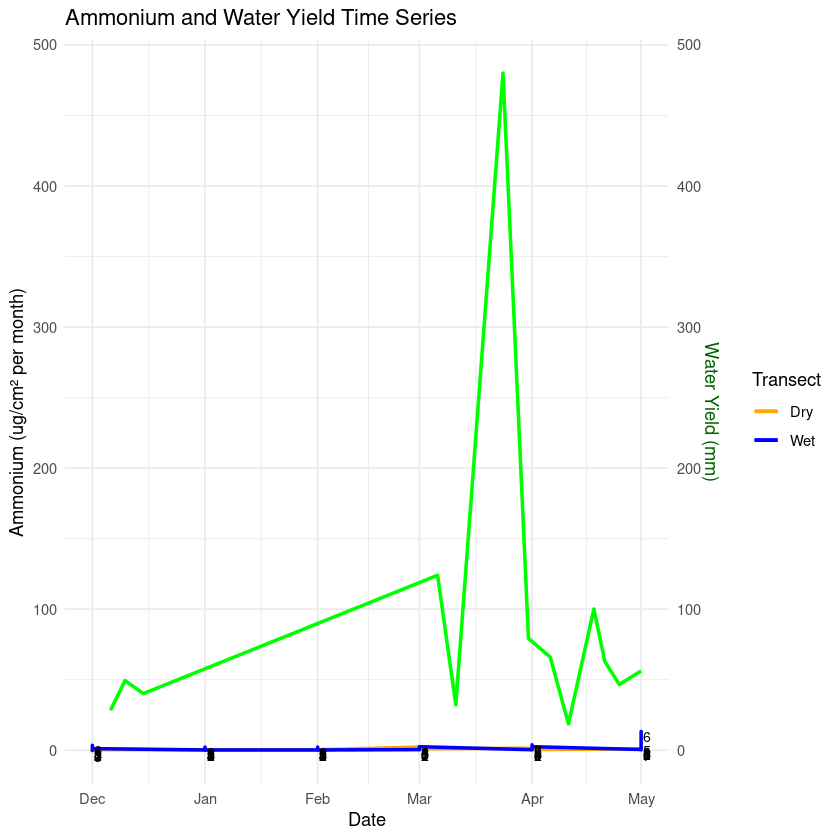

In [3]:
######################
# PLOT WITH 2 Y-AXES #
######################

# Convert the 'end' column in yield_data to Date format (remove time aspect)
yield_data <- yield_data %>%
  mutate(end = as.Date(end))

# Filter hungerford_data for the desired date range
hungerford_data_filtered <- hungerford_data %>%
  filter(Date >= as.Date("2021-12-01") & Date <= as.Date("2022-05-01"))

# Filter yield_data for the same date range
yield_data_filtered <- yield_data %>%
  filter(end >= as.Date("2021-12-01") & end <= as.Date("2022-05-01"))

# Create the plot
ggplot() +
  # Plot Ammonium data (primary Y-axis)
  geom_line(data = hungerford_data_filtered %>% filter(Transect == "Dry"),
            aes(x = Date, y = ug_cm2_month, color = "Dry"), size = 1) +
  geom_line(data = hungerford_data_filtered %>% filter(Transect == "Wet"),
            aes(x = Date, y = ug_cm2_month, color = "Wet"), size = 1) +
  # Plot water yield data (secondary Y-axis)
  geom_line(data = yield_data_filtered,
            aes(x = end, y = water_yield_mm), color = "green", size = 1) +
  # Annotate Pit numbers for Ammonium data
  geom_text(data = hungerford_data_filtered, aes(x = Date, y = ug_cm2_month, label = Pit), 
            hjust = -0.2, vjust = 1, size = 3) +
  # Custom colors for Ammonium transects
  scale_color_manual(values = c("Dry" = "orange", "Wet" = "blue")) +
  # Secondary Y-axis for water yield
  scale_y_continuous(
    name = "Ammonium (ug/cm² per month)",  # Primary Y-axis label
    sec.axis = sec_axis(~ ., name = "Water Yield (mm)")  # Secondary Y-axis label
  ) +
  # Define X-axis limits (date range)
  scale_x_date(limits = as.Date(c("2021-12-01", "2022-05-01"))) +
  # Add labels and theme
  labs(title = "Ammonium and Water Yield Time Series",
       x = "Date",
       color = "Transect") +
  theme_minimal() +
  theme(
    axis.title.y.right = element_text(color = "darkgreen")  # Color the secondary Y-axis label
  )
